# Visualize defaced vs original manual ratings

## Ordinal ratings

Simulate human ratings of image quality. The ratings are randomly sampled from {1,2,3,4} and randomly distributed across subjects. To introduce a bias in the ratings of defaced images, we add +1 to a predefined precentage of the ratings on original images. The percentage of scan affected varies between raters. 

In [5]:
## Simulate data with bias
n_rated <- 580
n_sub <- 580 #nbr of subjects available in the dataset
n_rater <- 4 #nbr of raters
perc_biased <- c(2,10,60,90) #4 raters + bias
file_name="SimulatedData/SimulatedDefacedRatings_4raters_bias.Rda"

source("simulate_data.R")

df <- simulate_data(n_rated, n_sub, n_rater, perc_biased, file=file_name)

### Plot ratings distribution

To verify that a bias is visible in the data, we plot for each rater the ratings distribution differentially for the defaced vs original conditions.

In [6]:
## Create dataframe with frequency counts
df_small <- data.frame(rater = df$rater, ratings = df$ratings, defaced =df$defaced)
conTable <- table(df_small)
df_freq <- as.data.frame(conTable)
df_freq

rater,ratings,defaced,Freq
<fct>,<fct>,<fct>,<int>
rater01,1,original,139
rater02,1,original,152
rater03,1,original,152
rater04,1,original,154
rater01,2,original,142
rater02,2,original,149
rater03,2,original,147
rater04,2,original,142
rater01,3,original,143


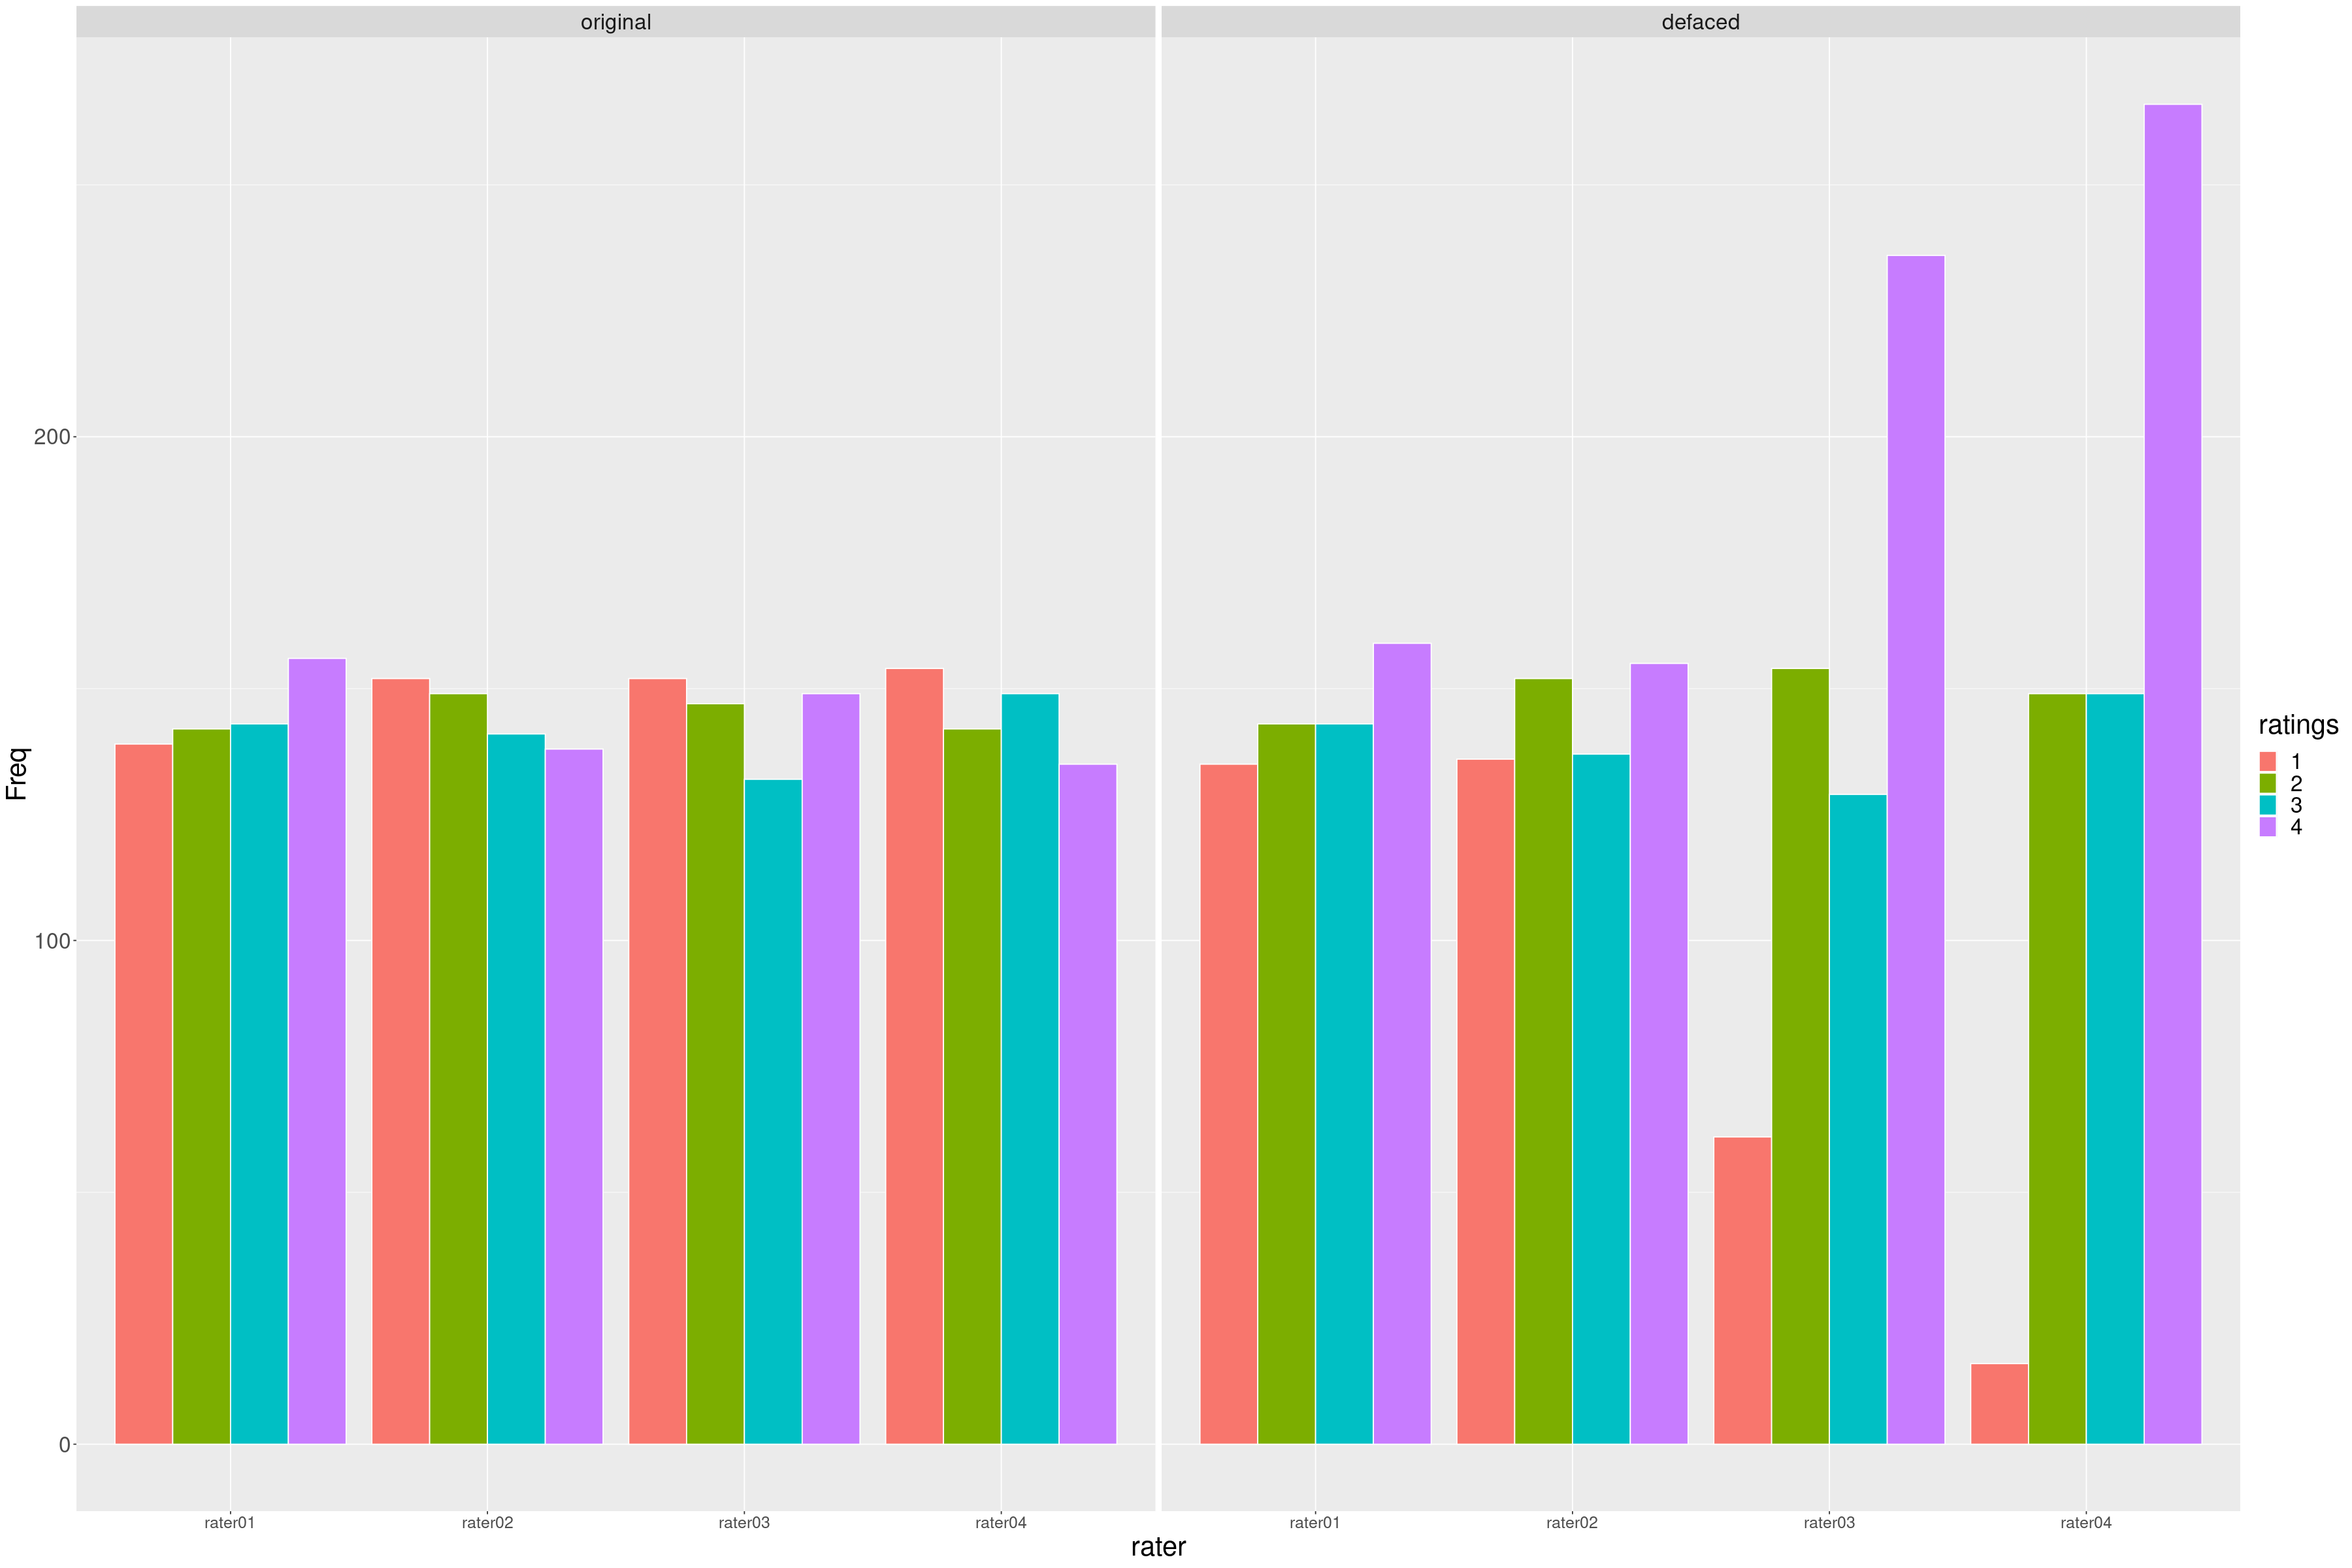

In [7]:
options(repr.plot.width = 30, repr.plot.height = 20)
library(ggplot2)
## Bar plot
ggplot(df_freq, aes(x = rater, y = Freq))+
  geom_bar(
    aes(fill = ratings), stat = "identity", color = "white",
    position = position_dodge(0.9) 
    )+
  facet_wrap(~defaced)+
  theme(text = element_text(size = 25))+
  theme(axis.text.x = element_text(size = 15))

## Continous ratings

Simulate human ratings of image quality. The ratings are randomly sampled from [0,1] at 0.1 increment and randomly distributed across subjects. To introduce a bias in the ratings of defaced images, we add +0.2 to a predefined precentage of the ratings on original images. The percentage of scan affected varies between raters. 

In [27]:
## Simulate continuous data with bias
n_rated <- 580
n_sub <- 580 #nbr of subjects available in the dataset
n_rater <- 4 #nbr of raters
perc_biased <- c(2,10,60,90) #4 raters + bias
ratings_range <- seq(0,1,length.out=11)
labels <- c('excluded','0.1','poor','0.3','acceptable','0.5','good','0.7','very good','0.9','excellent')
bias <- 0.2
file_name <- 'SimulatedData/SimulatedDefacedRatings_continuous.Rda'

source("simulate_data.R")

df_cont <- simulate_data(n_rated, n_sub, n_rater, perc_biased, ratings_range=ratings_range, labels=labels, bias=bias, file=file_name)

In [23]:
## Create dataframe with frequency counts
df_cont_small <- data.frame(rater = df_cont$rater, ratings = df_cont$ratings, defaced =df_cont$defaced)
conTable <- table(df_cont_small)
df_cont_freq <- as.data.frame(conTable)
df_cont_freq

rater,ratings,defaced,Freq
<fct>,<fct>,<fct>,<int>
rater01,excluded,original,52
rater02,excluded,original,57
rater03,excluded,original,47
rater04,excluded,original,52
rater01,0.1,original,50
rater02,0.1,original,49
rater03,0.1,original,55
rater04,0.1,original,49
rater01,poor,original,62


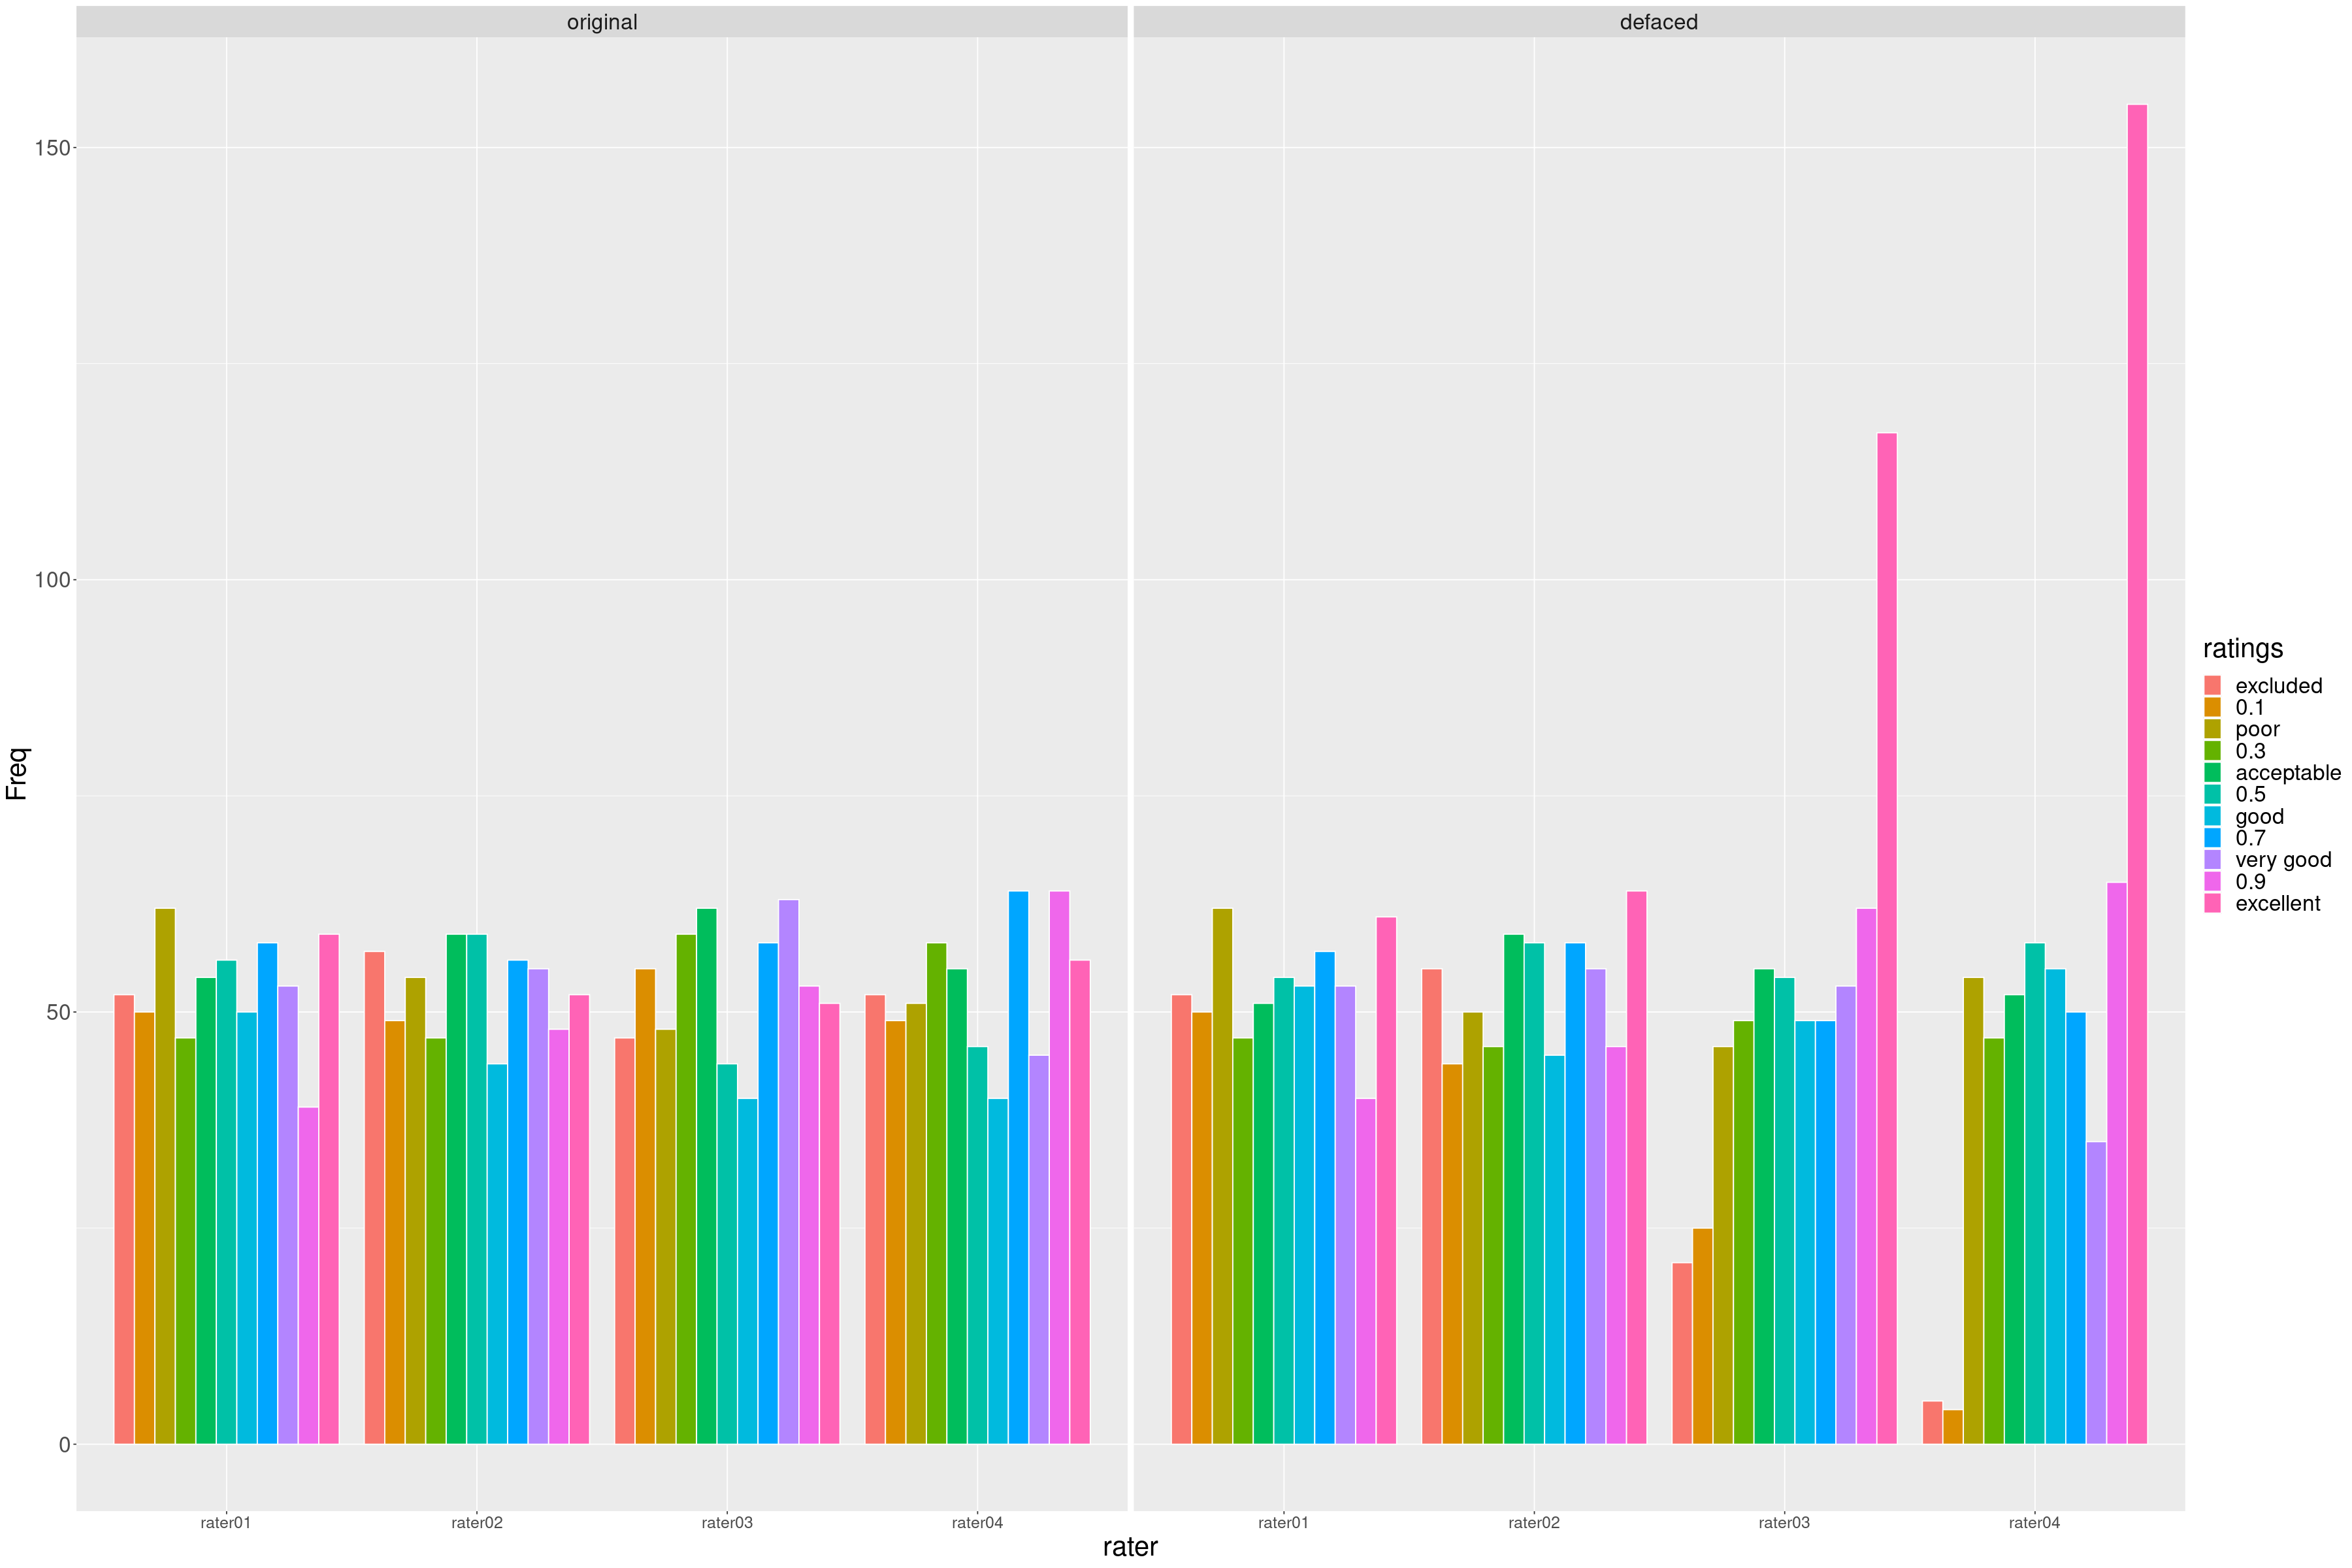

In [24]:
library(ggplot2)
## Bar plot
ggplot(df_cont_freq, aes(x = rater, y = Freq))+
  geom_bar(
    aes(fill = ratings), stat = "identity", color = "white",
    position = position_dodge(0.9) 
    )+
  facet_wrap(~defaced)+
  theme(text = element_text(size = 25))+
  theme(axis.text.x = element_text(size = 15))

## Other plots attempt

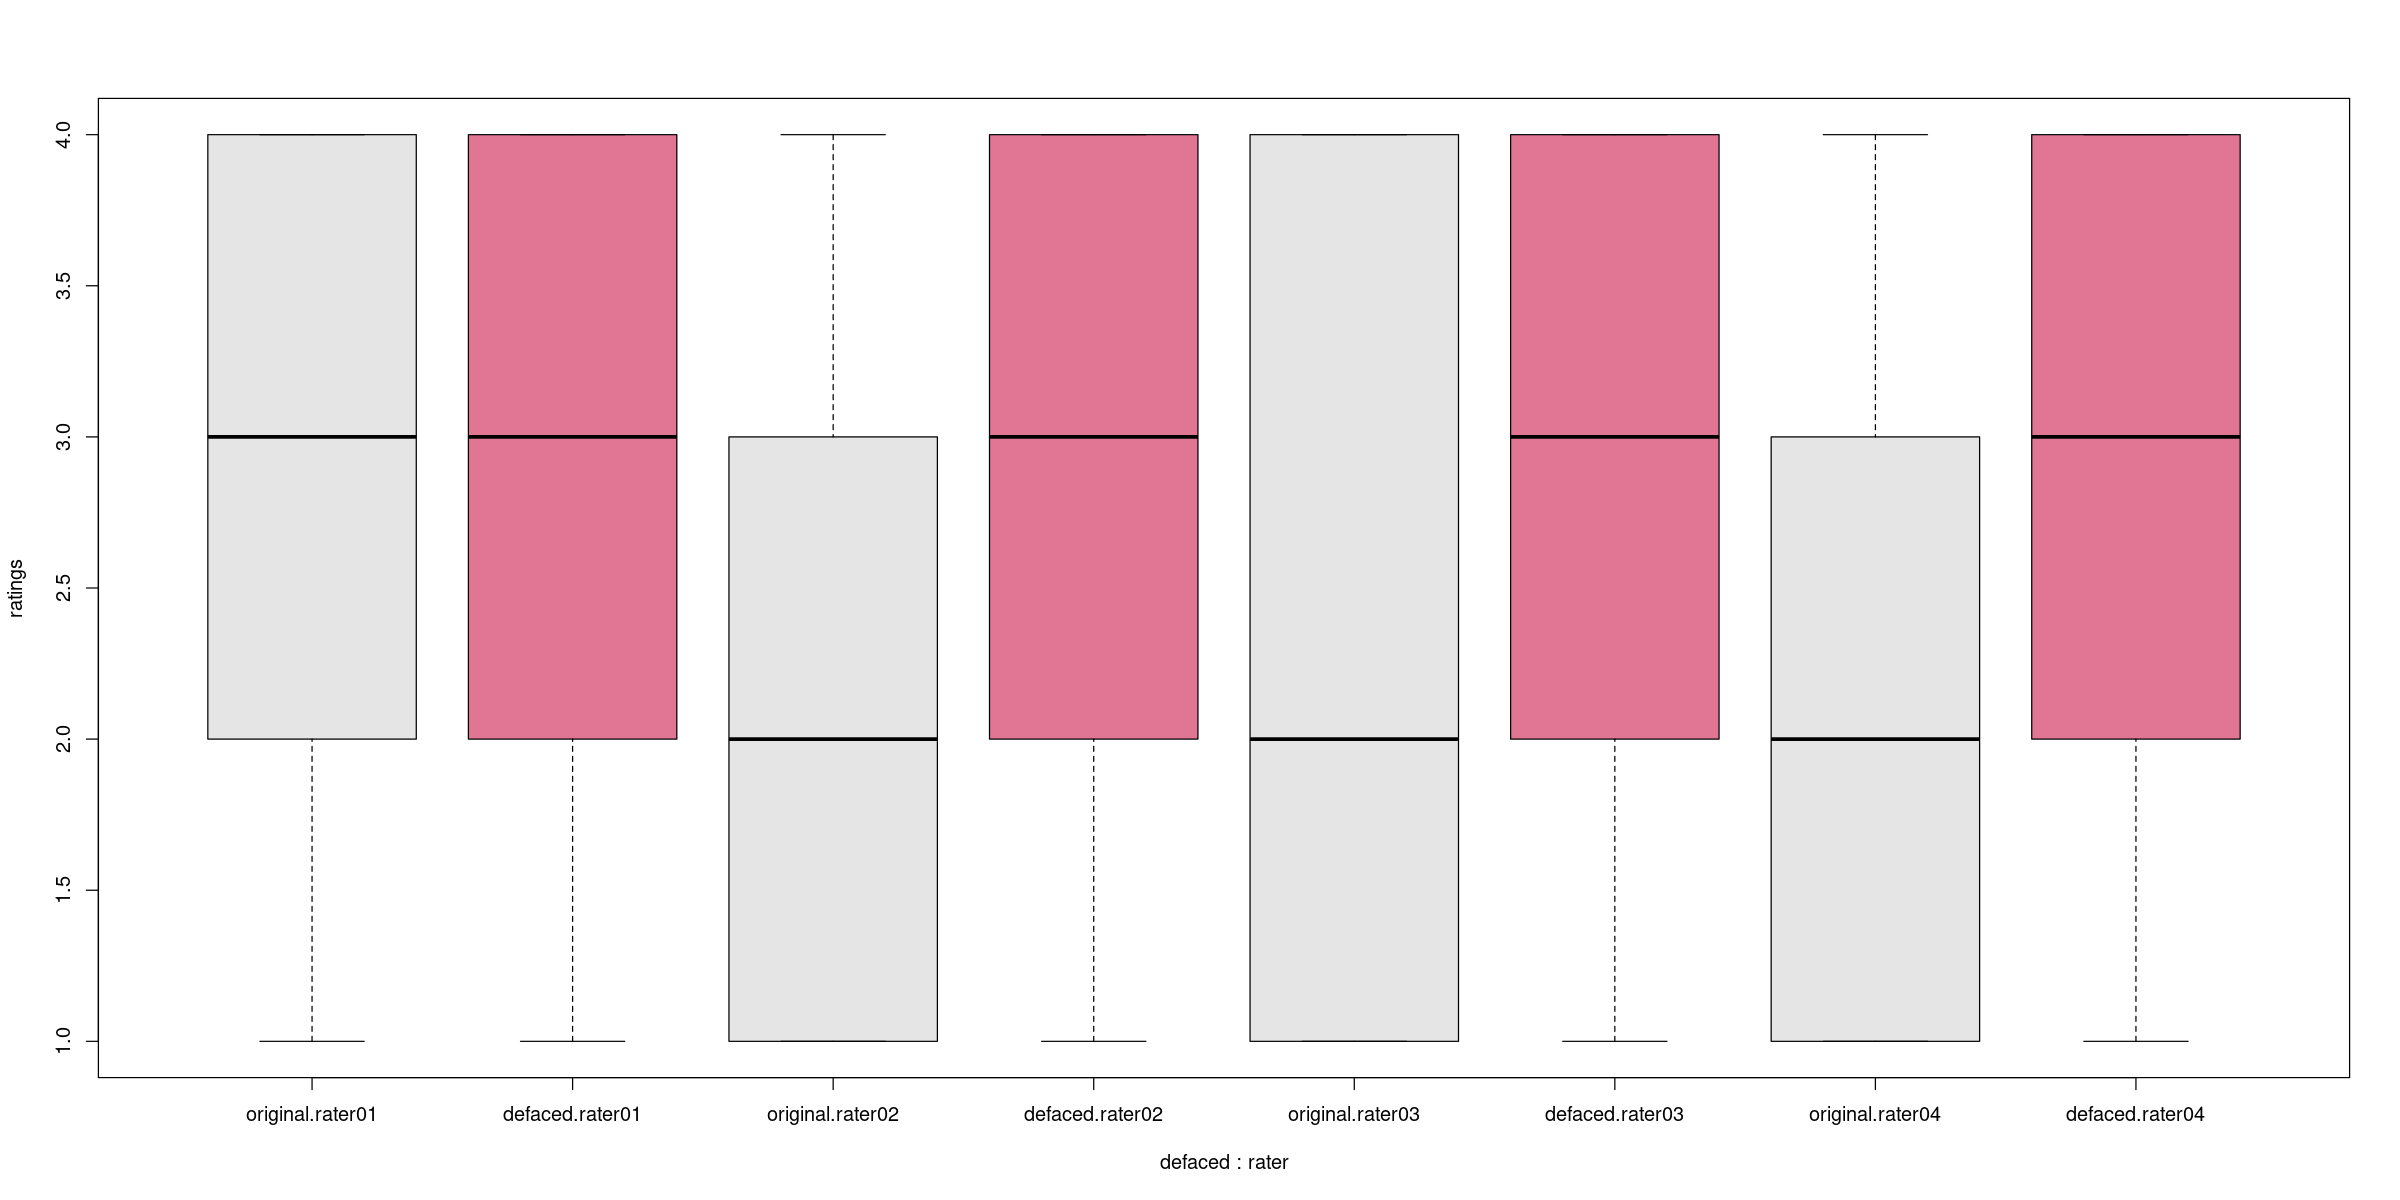

In [20]:
## Boxplot
#change size of displayed plot
library(repr)
options(repr.plot.width=20, repr.plot.height=10)

#create color vector
myColors <- ifelse(levels(df$defaced)=="defaced" , rgb(0.8,0.1,0.3,0.6) , 
              ifelse(levels(df$defaced)=="original", "grey90",
              "grey90" ) )

boxplot(ratings~defaced+rater, data=df, col=myColors)

#Add legend
legend(22,1.5, legend = c("Original","Defaced") , bg='lightblue',
    col = c('grey90', rgb(0.8,0.1,0.3,0.6)) , bty = "n", pch=20 , pt.cex = 3, 
    cex = 1, horiz = FALSE, inset = c(0.03, 0.1), box.lty=1)

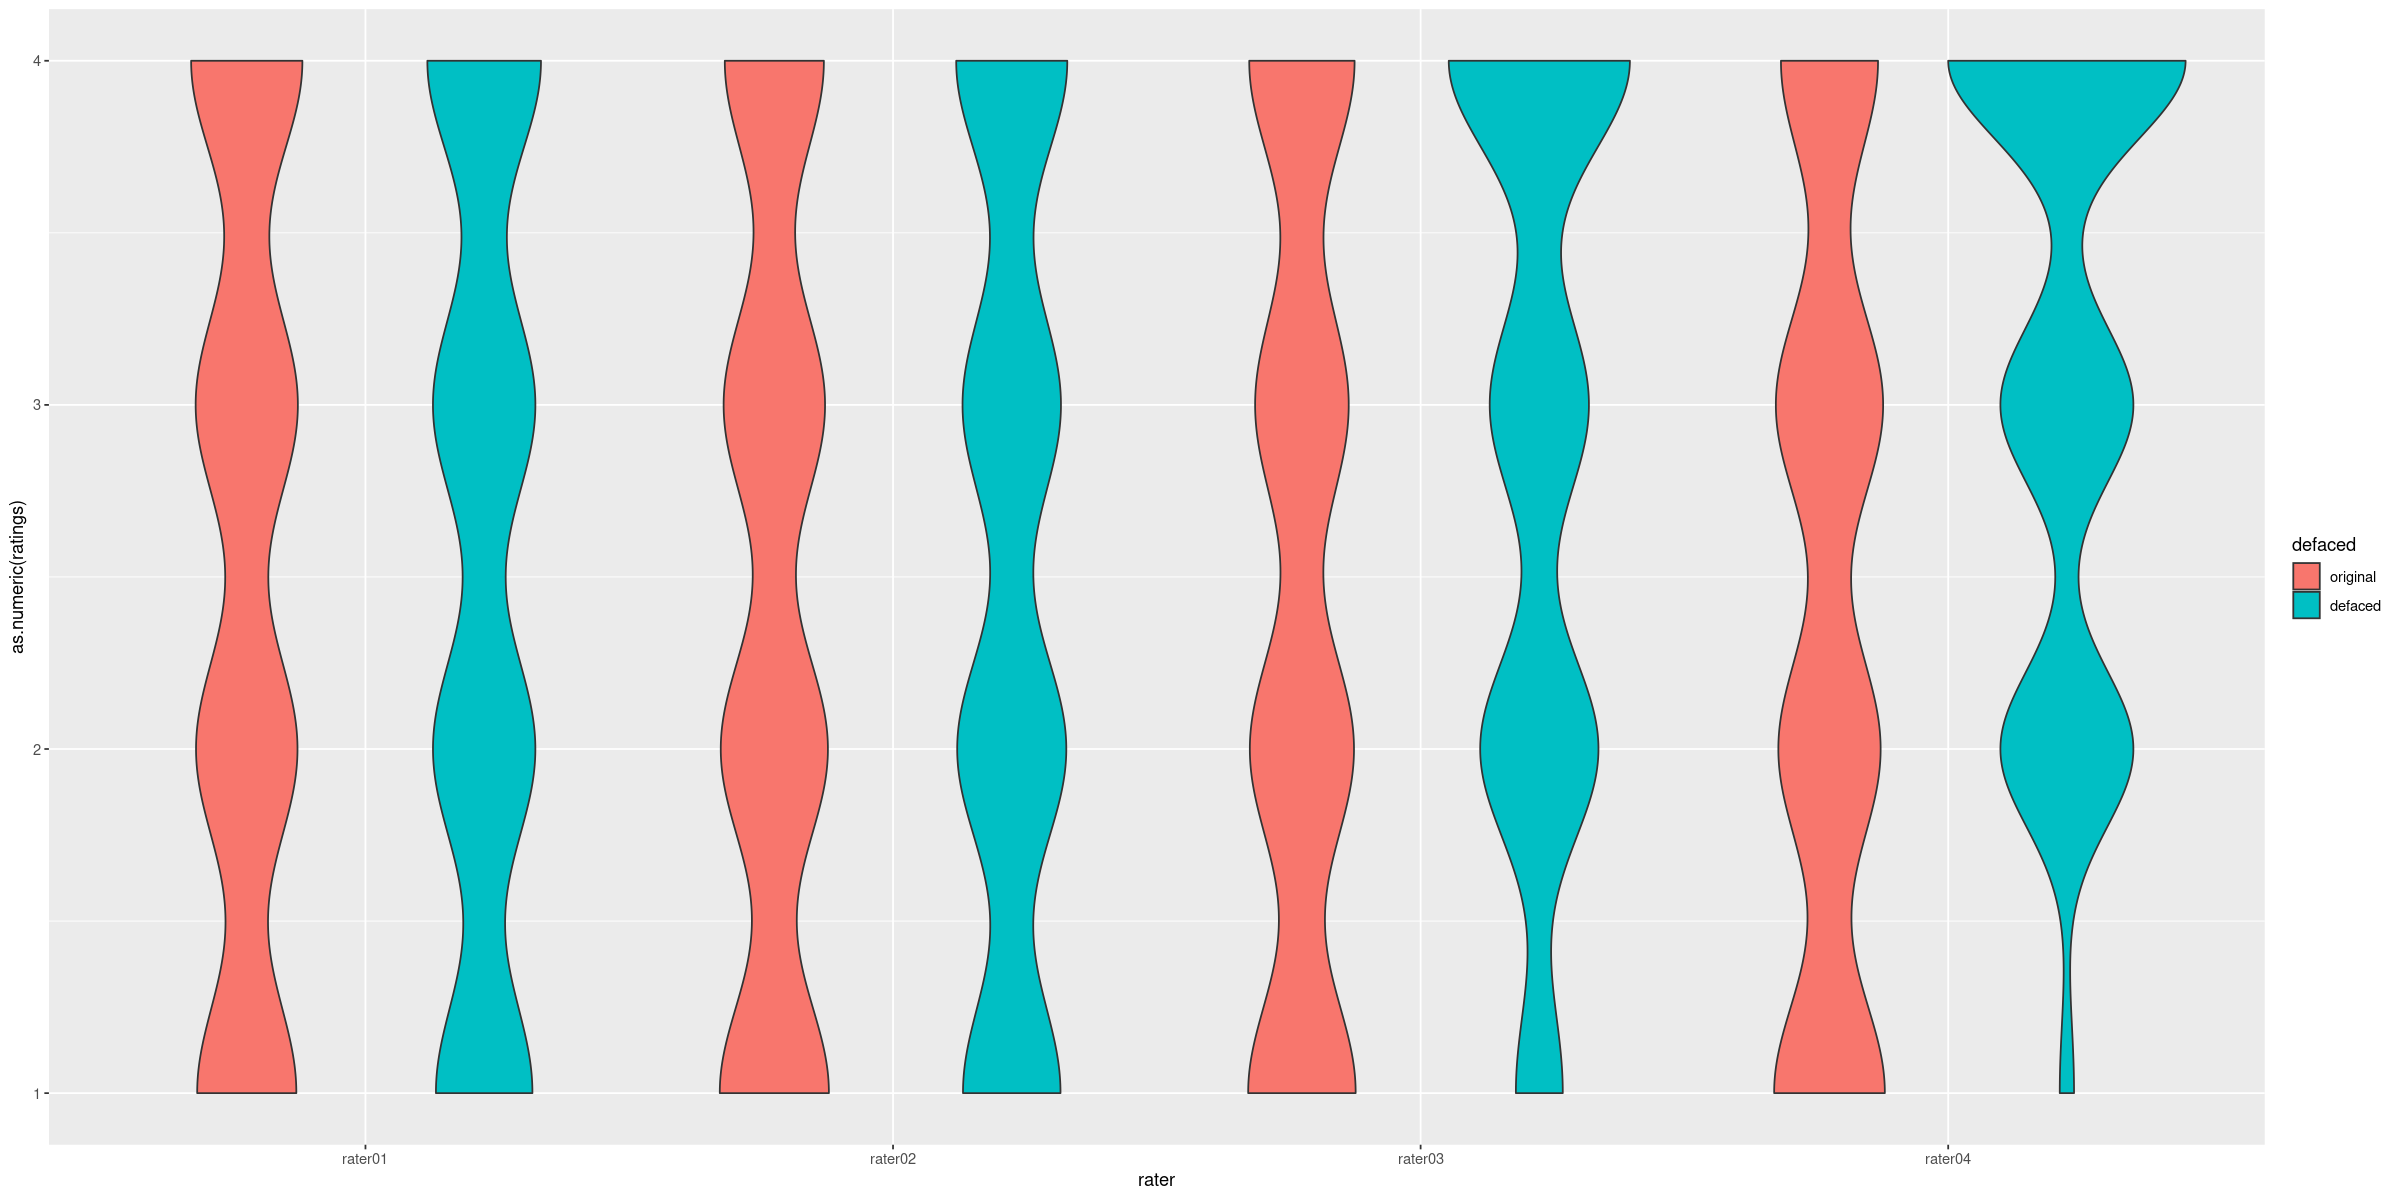

In [21]:
## Violinplot
library(ggplot2)
p <- ggplot(df, aes(x=rater, y=as.numeric(ratings), fill=defaced)) + geom_violin()
p

In [22]:
## Balloon plot
library(ggplot2)
ggballoonplot(df_freq, x = "rater", y = "ratings", size = "Freq",
              fill = "Freq", facet.by = "defaced",
              ggtheme = theme_bw()) +
  scale_fill_viridis_c(option = "C")

ERROR: Error in ggballoonplot(df_freq, x = "rater", y = "ratings", size = "Freq", : could not find function "ggballoonplot"
